In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('COVID19INDIA_CAPSTPROJECT.csv')

C:\Users\singhegm\Anaconda3\Anaconda1\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.head()

,Unnamed: 0,Num Cases,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,Current Status,Day,Month,Year
0,0,1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,Recovered,30,1,2020
1,1,1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,Recovered,2,2,2020
2,2,1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,Recovered,3,2,2020
3,3,1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,Recovered,2,3,2020
4,4,1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,Recovered,2,3,2020


In [6]:
day = data[data['Current Status'] == 'Hospitalized'].groupby(['Month', 'Day'])[['Num Cases']].sum()
day

Num Cases
Month Day           
3     4          135
      5           27
      7           54
      9          108
      10         108
      11         216
      12         108
      13         162
      14         297
      15         216
      16         324
      17         378
      18         594
      19         567
      20        1404
      21        1809
      22        1593
      23        2214
      24        1701
      25        2025
      26        1566
      27        3780
      28        3321
      29        2862
      30        4806
      31        8262
4     1        11421
      2        13095
      3        15012
      4        15552
      5        16362
      6        13095
      7        15390
      8        15201
      9        21924
      10       23490
      11       23031
      12       20466
      13       33561
      14       27837
      15       23868
      16       28647
      17       24894
      18       36990
      19       42633

In [9]:
x = np.arange(len(day))
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

In [7]:
y = day.values
y

array([[  135],
       [   27],
       [   54],
       [  108],
       [  108],
       [  216],
       [  108],
       [  162],
       [  297],
       [  216],
       [  324],
       [  378],
       [  594],
       [  567],
       [ 1404],
       [ 1809],
       [ 1593],
       [ 2214],
       [ 1701],
       [ 2025],
       [ 1566],
       [ 3780],
       [ 3321],
       [ 2862],
       [ 4806],
       [ 8262],
       [11421],
       [13095],
       [15012],
       [15552],
       [16362],
       [13095],
       [15390],
       [15201],
       [21924],
       [23490],
       [23031],
       [20466],
       [33561],
       [27837],
       [23868],
       [28647],
       [24894],
       [36990],
       [42633]], dtype=int64)

### Model 3: Support Vector Machines - Radial Basis Function

#### Step1: - Reshape and Standardization: standardising the data in a particular range
    standardised_data = (x - mean)/std deviation

In [10]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [11]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

In [15]:
sx = sc_X.fit_transform(x)
sx

array([[-1.69397911],
       [-1.61698006],
       [-1.53998101],
       [-1.46298196],
       [-1.38598291],
       [-1.30898386],
       [-1.23198481],
       [-1.15498576],
       [-1.0779867 ],
       [-1.00098765],
       [-0.9239886 ],
       [-0.84698955],
       [-0.7699905 ],
       [-0.69299145],
       [-0.6159924 ],
       [-0.53899335],
       [-0.4619943 ],
       [-0.38499525],
       [-0.3079962 ],
       [-0.23099715],
       [-0.1539981 ],
       [-0.07699905],
       [ 0.        ],
       [ 0.07699905],
       [ 0.1539981 ],
       [ 0.23099715],
       [ 0.3079962 ],
       [ 0.38499525],
       [ 0.4619943 ],
       [ 0.53899335],
       [ 0.6159924 ],
       [ 0.69299145],
       [ 0.7699905 ],
       [ 0.84698955],
       [ 0.9239886 ],
       [ 1.00098765],
       [ 1.0779867 ],
       [ 1.15498576],
       [ 1.23198481],
       [ 1.30898386],
       [ 1.38598291],
       [ 1.46298196],
       [ 1.53998101],
       [ 1.61698006],
       [ 1.69397911]])

In [16]:
sy = sc_y.fit_transform(y)
sy

array([[-0.86297041],
       [-0.87218744],
       [-0.86988318],
       [-0.86527467],
       [-0.86527467],
       [-0.85605763],
       [-0.86527467],
       [-0.86066615],
       [-0.84914486],
       [-0.85605763],
       [-0.8468406 ],
       [-0.84223208],
       [-0.82379801],
       [-0.82610227],
       [-0.75467026],
       [-0.72010638],
       [-0.73854045],
       [-0.6855425 ],
       [-0.72932341],
       [-0.70167231],
       [-0.74084471],
       [-0.55189551],
       [-0.59106791],
       [-0.6302403 ],
       [-0.46433369],
       [-0.1693886 ],
       [ 0.10020964],
       [ 0.24307367],
       [ 0.40667602],
       [ 0.45276119],
       [ 0.52188894],
       [ 0.24307367],
       [ 0.43893564],
       [ 0.42280583],
       [ 0.99656619],
       [ 1.13021319],
       [ 1.09104079],
       [ 0.87213623],
       [ 1.9897016 ],
       [ 1.5011988 ],
       [ 1.1624728 ],
       [ 1.57032656],
       [ 1.25003463],
       [ 2.28234243],
       [ 2.76393245]])

In [19]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(sx,sy.ravel())     # ravel() converts 2-D array into 1-D array, we can use if wish to

SVR()

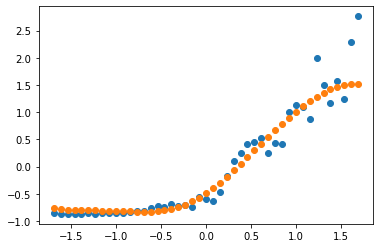

In [23]:
plt.scatter(sx, sy)
plt.scatter(sx, regressor.predict(sx))
plt.show()

In [21]:
regressor.score(sx, sy) * 100

92.19631377006539

## we can see that SVM-RBF gives 92.2% Accuracy

# Model 4: Decision Tree Regression

In [26]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(x,y)

DecisionTreeRegressor()

In [33]:
Yp = reg.predict(x)
Yp = Yp.reshape(-1, 1)
Yp

array([[1.3500e+02],
       [2.7000e+01],
       [5.4000e+01],
       [1.0800e+02],
       [1.0800e+02],
       [2.1600e+02],
       [1.0800e+02],
       [1.6200e+02],
       [2.9700e+02],
       [2.1600e+02],
       [3.2400e+02],
       [3.7800e+02],
       [5.9400e+02],
       [5.6700e+02],
       [1.4040e+03],
       [1.8090e+03],
       [1.5930e+03],
       [2.2140e+03],
       [1.7010e+03],
       [2.0250e+03],
       [1.5660e+03],
       [3.7800e+03],
       [3.3210e+03],
       [2.8620e+03],
       [4.8060e+03],
       [8.2620e+03],
       [1.1421e+04],
       [1.3095e+04],
       [1.5012e+04],
       [1.5552e+04],
       [1.6362e+04],
       [1.3095e+04],
       [1.5390e+04],
       [1.5201e+04],
       [2.1924e+04],
       [2.3490e+04],
       [2.3031e+04],
       [2.0466e+04],
       [3.3561e+04],
       [2.7837e+04],
       [2.3868e+04],
       [2.8647e+04],
       [2.4894e+04],
       [3.6990e+04],
       [4.2633e+04]])

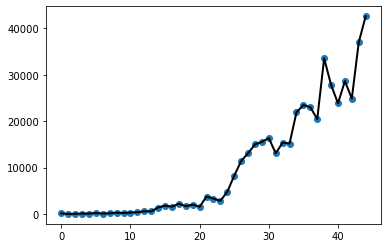

In [34]:
plt.scatter(x, y)
plt.plot(x, Yp, color = 'k', linewidth = 2)
plt.show()

In [35]:
reg.score(x, y) * 100

100.0

In [37]:
reg.predict([[44]])

array([42633.])

In [38]:
y[44]

array([42633], dtype=int64)

In [39]:
reg.predict([[48]])

array([42633.])

In [40]:
reg.predict([[95]])

array([42633.])

### Here we can see the model is Overfitting, as we can see the distribution between x and y plot is not sufficient to use Decision Tree model also we have provided more features to the model for making the prediction also .

# Model 5: Random Forest Regression

In [44]:
from sklearn.ensemble import RandomForestRegressor
freg = RandomForestRegressor()
freg.fit(x,y.ravel())

RandomForestRegressor()

In [46]:
freg.score(x,y) * 100

98.99199936407425

In [50]:
fy = freg.predict(x)
fy = fy.reshape(-1, 1)
fy

array([[  106.92],
       [   59.4 ],
       [   52.92],
       [   90.45],
       [  116.37],
       [  176.58],
       [  141.21],
       [  160.65],
       [  256.23],
       [  248.4 ],
       [  306.18],
       [  374.49],
       [  538.11],
       [  635.85],
       [ 1212.57],
       [ 1628.37],
       [ 1662.93],
       [ 2050.65],
       [ 1851.39],
       [ 1919.97],
       [ 1945.89],
       [ 3202.74],
       [ 3328.02],
       [ 3161.16],
       [ 4410.18],
       [ 7747.92],
       [10675.53],
       [12715.11],
       [14604.57],
       [15372.99],
       [15813.63],
       [14281.38],
       [14832.72],
       [16050.69],
       [20795.94],
       [22779.9 ],
       [23277.51],
       [22505.58],
       [29110.05],
       [28763.1 ],
       [25568.73],
       [27753.03],
       [26747.01],
       [33458.94],
       [39280.14]])

In [48]:
freg.predict([[44]])

array([39280.14])

In [49]:
freg.predict([[48]])

array([39280.14])

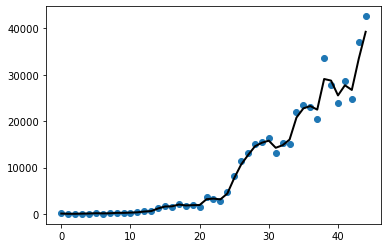

In [52]:
plt.scatter(x, y)
plt.plot(x, fy, color = 'k', linewidth = 2)
plt.show()

### here also we can see Overfitting of the model, hence not a best choice for linear relation

## Conclusion - We can see that Polynomial Regression model is the best for now but when the case will satrt decreasing more and the behaviour of the graph will become curve then we can change our model to SVM with RBF kernel.